# Working With Dates Exercise

https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components

In [1]:
# Import the "kc_house_data.csv" and parse the "date" column in a single line
import pandas as pd
path = r"C:\Users\stask\Python Data Analysis & Visualization Masterclass\data\kc_house_data.csv".replace('\\', '/')
houses = pd.read_csv(path, parse_dates=['date'])
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [33]:
# Calculate how many days the dataset spans
timespan = houses.date.max() - houses.date.min()
timespan.days

390

In [28]:
# Find the date that had the most house sales
houses.date.value_counts().head(3)

2014-06-23    142
2014-06-26    131
2014-06-25    131
Name: date, dtype: int64

In [30]:
# Find all the homes sold on that date
houses[houses.date == '2014-06-23'].shape

(142, 21)

<AxesSubplot:ylabel='date'>

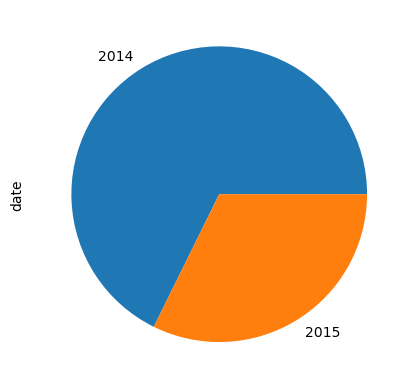

In [34]:
# Create a pie chart showing the years that home sales took place in (2014 and 2015)
houses.date.dt.year.value_counts().plot(kind='pie')

In [41]:
# Find all the homes sold in 2014, sorted from earliest to latest
houses[houses.date.dt.year == 2014].sort_values('date')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11907,3221059036,2014-05-02,400000.0,4,2.50,3630,42884,1.5,0,0,...,9,2300,1330,1979,0,98092,47.2617,-122.190,2830,80148
20559,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0,0,...,7,1280,350,2009,0,98106,47.5489,-122.363,1590,2306
17038,2326059099,2014-05-02,838000.0,4,2.50,3310,42998,2.0,0,0,...,9,3310,0,2001,0,98052,47.7232,-122.131,3350,42847
15921,7831800460,2014-05-02,235000.0,2,1.00,1210,9400,1.0,0,0,...,6,1210,0,1949,0,98106,47.5342,-122.360,1580,6026
11891,7305300695,2014-05-02,625000.0,4,2.50,2820,8408,2.0,0,0,...,9,2820,0,2014,0,98155,47.7538,-122.325,1300,8408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,7701990700,2014-12-31,825000.0,4,2.50,3210,18901,2.0,0,0,...,10,3210,0,1993,0,98077,47.7090,-122.073,3330,18901
8393,2493200215,2014-12-31,582000.0,3,1.75,1820,3140,2.0,0,0,...,8,1820,0,1949,1990,98136,47.5271,-122.384,2030,5499
18462,7345200650,2014-12-31,219200.0,3,2.00,1680,7000,1.5,0,0,...,7,1680,0,1968,0,98002,47.2775,-122.203,1540,7480
9850,8861000060,2014-12-31,875000.0,3,1.00,1160,10732,1.0,0,0,...,7,1160,0,1953,0,98004,47.6391,-122.205,2390,13656


In [48]:
# Count up the number of sales that took place in each month of the year.  Which month had the most?
houses.date.dt.month.value_counts().head(3)

5    2414
4    2231
7    2211
Name: date, dtype: int64

<AxesSubplot:>

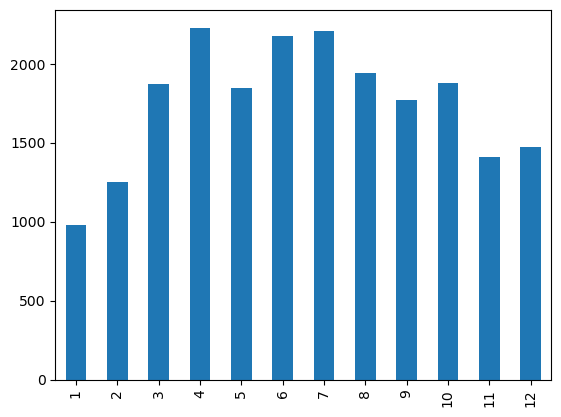

In [20]:
# Find the homes sold between May 1st 2014 and May 1st 2015
houses_specific_date = houses[houses.date.between('May 1st 2014', 'May 1st 2015')].sort_values('date')
# Create a bar plot showing the total number of sales per month in that period
houses_specific_date.date.dt.month.value_counts().sort_index().plot(kind='bar')

In [21]:
# Count up the number of homesales by day of the week
houses.date.dt.dayofweek.value_counts()

1    4715
2    4603
0    4099
3    3994
4    3685
5     287
6     230
Name: date, dtype: int64

<AxesSubplot:>

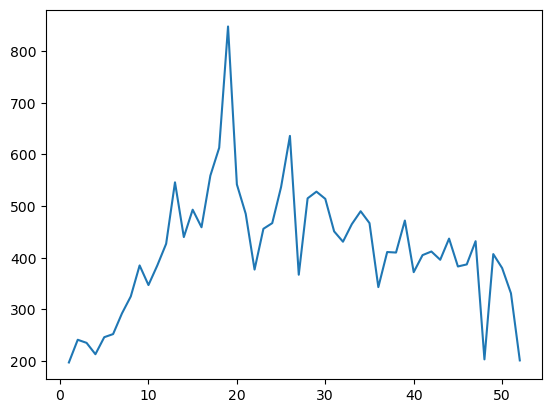

In [22]:
# Create a line plot showing the total number of sales by week of the year number
houses.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='line')

<AxesSubplot:>

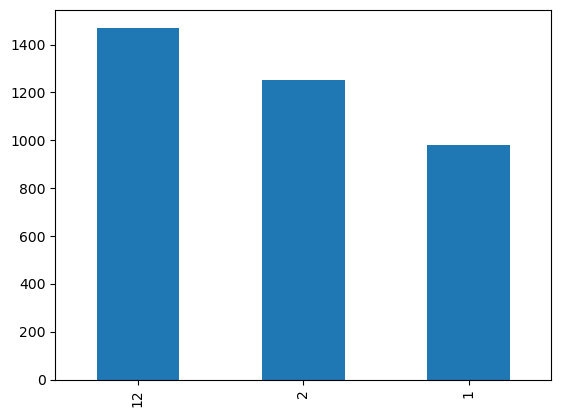

In [23]:
# Create a bar plot showing the total number of sales that took place in December, January, and February
months = [12, 1, 2]
houses[houses.date.dt.month.isin(months)].date.dt.month.value_counts().plot(kind='bar')

<AxesSubplot:>

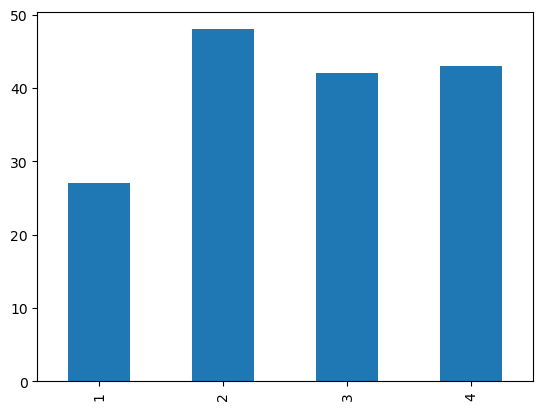

In [30]:
# Work with the homes sold between May 1st 2014 and May 1st 2015
# Within that year, find the waterfront homes that were sold
# Which quarter of that year had the most waterfront home sales?  The least?
# Create a bar plot showing the number of waterfront home sales per quarter
houses_specific_date[houses_specific_date.waterfront == 1].date.dt.quarter.value_counts().sort_index().plot(kind='bar')